# Lending Club Statistics 선형 회귀 분석

이 데이터셋에는 현재 대출 상태 (대출중, 연체, 갚음 등) 및 최신 지불 정보를 포함하여 명시된 기간 동안 발행 된 모든 대출에 대한 완전한 대출 데이터가 들어 있습니다. "현재"를 통한 대출 데이터가 포함 된 파일에는 이전에 완료 한 달력 분기를 통해 발행 된 모든 대출에 대한 전체 대출 데이터가 들어 있습니다.

데이터셋 URL : https://www.lendingclub.com/info/download-data.action

* 데이터 셋
    * 2016년 1, 2, 3, 4분기 데이터

In [1]:
# Load Packages
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
from ipykernel import kernelapp as app
# Settings
%matplotlib inline
sns.set(font="NanumGothic")

전체 121 컬럼 중에서 특징이 중복되는 컬럼을 제거하여 아래와 같이 정리하여 유의성을 확인하였습니다.

|컬럼명|설명|값 예시|
|---|---|---|
|loan_amnt|456|123|
|term
|int_rate
|installment
|sub_grade
|home_ownership
|annual_inc|
|pymnt_plan|
|dti|
|delinq_2yrs|
|inq_last_6mths|
|mths_since_last_delinq|
|mths_since_last_record|
|open_acc|
|pub_rec
|revol_bal
|revol_util
|total_acc
|out_prncp
|out_prncp_inv
|total_pymnt
|total_pymnt_inv
|total_rec_prncp
|total_rec_int
|total_rec_late_fee
|recoveries
|collection_recovery_fee
|last_pymnt_amnt|
|collections_12_mths_ex_med
|mths_since_last_major_derog|
|policy_code
|application_type
|acc_now_delinq
|tot_coll_amt
|tot_cur_bal
|open_acc_6m
|open_il_6m|
|open_il_12m
|open_il_24m
|mths_since_rcnt_il
|total_bal_il
|il_util
|open_rv_12m
|open_rv_24m
|max_bal_bc
|all_util
|total_rev_hi_lim
|inq_fi
|total_cu_tl
|inq_last_12m
|acc_open_past_24mths
|avg_cur_bal
|bc_open_to_buy
|bc_util
|chargeoff_within_12_mths
|delinq_amnt
|mo_sin_old_il_acct
|mo_sin_old_rev_tl_op
|mo_sin_rcnt_rev_tl_op
|mo_sin_rcnt_tl
|mort_acc
|mths_since_recent_bc
|mths_since_recent_bc_dlq
|mths_since_recent_inq|
|mths_since_recent_revol_delinq|
|num_accts_ever_120_pd
|num_actv_bc_tl
|num_actv_rev_tl|
|num_bc_sats
|num_bc_tl|
|num_il_tl
|num_op_rev_tl
|num_rev_accts
|num_rev_tl_bal_gt_0
|num_sats
|num_tl_120dpd_2m
|num_tl_30dpd
|num_tl_90g_dpd_24m
|num_tl_op_past_12m|
|pct_tl_nvr_dlq|
|percent_bc_gt_75|
|pub_rec_bankruptcies|
|tax_liens|
|tot_hi_cred_lim|
|total_bal_ex_mort|
|total_bc_limit|
|total_il_high_credit_limit|


## 데이터 불러오기

* 데이터 상세 내용
    * 154MB
    * 첫번째 줄에 features 문자
    * 422,723 건    

In [38]:
df0 = pd.read_csv('~/hosthome/Documents/workspaces/projects/fc_team_project2/datasets/lcdf3.csv')
df1 = pd.read_csv("~/hosthome/Documents/workspaces/projects/fc_team_project2/datasets/lcdf4.csv")

## 데이터 전처리 과정

## 데이터 스케일링

In [16]:
# nan 값이 없는 칼럼을 drop으로 만듬. 재구현 코드 없음 !! 

float_col = [u'int_rate', u'installment', u'annual_inc', u'dti', u'inq_last_6mths',
       u'revol_util', u'out_prncp', u'out_prncp_inv', u'total_pymnt',
       u'total_pymnt_inv', u'total_rec_prncp', u'total_rec_int',
       u'total_rec_late_fee', u'recoveries', u'collection_recovery_fee',
       u'last_pymnt_amnt', u'open_acc_6m', u'open_il_6m', u'open_il_12m',
       u'open_il_24m', u'total_bal_il', u'open_rv_12m', u'open_rv_24m',
       u'max_bal_bc', u'all_util', u'inq_fi', u'total_cu_tl', u'inq_last_12m',
       u'mo_sin_old_il_acct', u'pct_tl_nvr_dlq']

# 값이 정수인 칼럼만 따로 표시 재구현 코드 없음!!

cat = ["loan_amnt","revol_bal", "tot_coll_amt", "tot_cur_bal",
       "tot_coll_amt", "total_rev_hi_lim", "avg_cur_bal", "mo_sin_old_rev_tl_op",
       "tot_hi_cred_lim","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]

In [17]:
#값이 실수인 것중 nan 없는 애들 민맥스 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df1[float_col])
df1[float_col] = scaler.transform(df1[float_col])

In [18]:
#값이 정수인 칼럽 민맥스 스케일링
scaler = MinMaxScaler()
scaler.fit(df1[cat])
df1[cat] = scaler.transform(df1[cat])

### 이자율 데이터를 실수로 변환

원본 데이터에는 18.8% 형식의 문자열 데이터로 되어 있어 '%' 문자열을 제거하여 실수형으로 변환하였습니다.

In [26]:
int_col = df1.dtypes[df1.dtypes =="int64"].index
float_col = df1.dtypes[df1.dtypes == "float64"].index

df1.loc[:, int_col]
#df0.loc[:, float_col]

## 모형 만들기

In [39]:
pd.options.display.max_rows=100
df0.isnull().sum()

loan_amnt                              0
term                                   0
int_rate                               0
installment                            0
sub_grade                              0
home_ownership                         0
annual_inc                             0
pymnt_plan                             0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
mths_since_last_delinq            191309
mths_since_last_record            331910
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
out_prncp                              0
out_prncp_inv                          0
total_pymnt                            0
total_pymnt_inv                        0
total_rec_prncp                        0
total_rec_int                          0
total_rec_late_f

In [40]:
md1 = sm.OLS.from_formula('int_rate ~ acc_open_past_24mths + avg_cur_bal + tot_hi_cred_lim + total_bal_ex_mort + total_bc_limit + total_il_high_credit_limit + annual_inc + avg_cur_bal + total_rev_hi_lim + total_bal_il + tot_cur_bal + revol_bal', df0)
rs1 = md1.fit()
print(rs1.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     6674.
Date:                Tue, 11 Jul 2017   Prob (F-statistic):               0.00
Time:                        21:21:38   Log-Likelihood:             6.8852e+05
No. Observations:              410907   AIC:                        -1.377e+06
Df Residuals:                  410895   BIC:                        -1.377e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [41]:
# 로그 취한 종속변수 추가
df0['log_int_rate'] = np.log(df0.int_rate)

In [42]:
df0['trhl'] = df0['total_rev_hi_lim'] / (df0['num_rev_accts'] + 1) 
df0['tbl'] = df0['total_bc_limit'] / (df0['num_bc_tl'] + 1) 
df0['tihcl'] = df0['total_il_high_credit_limit'] / (df0['num_il_tl'] + 1)

In [43]:
md1 = sm.OLS.from_formula('log_int_rate ~ acc_open_past_24mths + avg_cur_bal + tot_hi_cred_lim + total_bal_ex_mort + tbl + tihcl + trhl+ annual_inc + avg_cur_bal + total_bal_il + tot_cur_bal + revol_bal', df0)
rs1 = md1.fit()
print(rs1.summary())

                            OLS Regression Results                            
Dep. Variable:           log_int_rate   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     5848.
Date:                Tue, 11 Jul 2017   Prob (F-statistic):               0.00
Time:                        21:21:45   Log-Likelihood:            -1.5240e+05
No. Observations:              410907   AIC:                         3.048e+05
Df Residuals:                  410895   BIC:                         3.050e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.1343 

In [44]:
sm.statsmd1 = sm.OLS.from_formula('int_rate ~ C(home_ownership) + delinq_2yrs + pct_tl_nvr_dlq + acc_open_past_24mths + avg_cur_bal + tot_hi_cred_lim + total_bal_ex_mort + tbl + tihcl + trhl+ annual_inc + avg_cur_bal + total_bal_il + tot_cur_bal + revol_bal', df0)
rs1 = md1.fit()
print(rs1.summary())

                            OLS Regression Results                            
Dep. Variable:           log_int_rate   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     5848.
Date:                Tue, 11 Jul 2017   Prob (F-statistic):               0.00
Time:                        21:21:50   Log-Likelihood:            -1.5240e+05
No. Observations:              410907   AIC:                         3.048e+05
Df Residuals:                  410895   BIC:                         3.050e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.1343 

In [45]:
sm.statsmd1 = sm.OLS.from_formula('int_rate ~ term + C(home_ownership) + delinq_2yrs + pct_tl_nvr_dlq + acc_open_past_24mths + avg_cur_bal + tot_hi_cred_lim + total_bal_ex_mort + tbl + tihcl + trhl+ annual_inc + avg_cur_bal + total_bal_il + tot_cur_bal + revol_bal + 0', df0)
rs1 = md1.fit()
print(rs1.summary())

                            OLS Regression Results                            
Dep. Variable:           log_int_rate   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     5848.
Date:                Tue, 11 Jul 2017   Prob (F-statistic):               0.00
Time:                        21:22:01   Log-Likelihood:            -1.5240e+05
No. Observations:              410907   AIC:                         3.048e+05
Df Residuals:                  410895   BIC:                         3.050e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.1343 

## lcdf4.csv 불러옴

In [47]:
del df1['Unnamed: 0']

In [48]:
md1 = sm.OLS.from_formula('int_rate ~ C(term) + acc_open_past_24mths + avg_cur_bal + total_bal_ex_mort + total_bc_limit + total_il_high_credit_limit + annual_inc + avg_cur_bal + total_rev_hi_lim + tot_cur_bal + revol_bal + 0', df1)
rs1 = md1.fit()
print(rs1.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                 1.808e+04
Date:                Tue, 11 Jul 2017   Prob (F-statistic):               0.00
Time:                        21:24:16   Log-Likelihood:             1.7091e+05
No. Observations:              410907   AIC:                        -3.418e+05
Df Residuals:                  410896   BIC:                        -3.417e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
C(term)[ 36 months] 

In [49]:
rs2 = sm.OLS.from_formula('int_rate ~ sub_grade + 0', df1).fit()
print(rs2.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 7.640e+05
Date:                Tue, 11 Jul 2017   Prob (F-statistic):               0.00
Time:                        21:24:29   Log-Likelihood:             9.5115e+05
No. Observations:              410907   AIC:                        -1.902e+06
Df Residuals:                  410872   BIC:                        -1.902e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sub_grade[A1]          0      0.000          0

## 데이터 상관관계 분석

#### 칼럼 중 신용 관련된 한계치들을 따로 추출

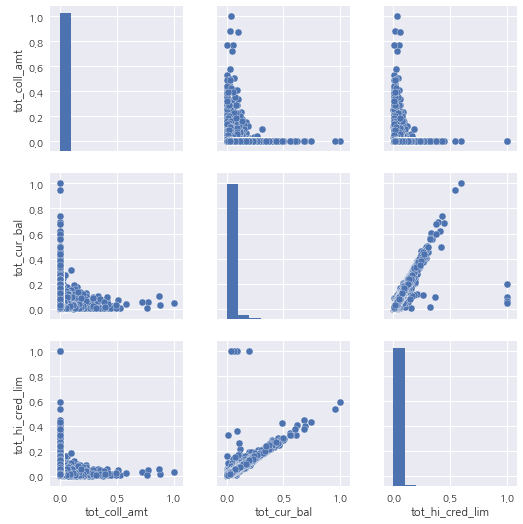

In [21]:
tot = ['tot_coll_amt','tot_cur_bal','tot_hi_cred_lim','total_acc','total_bal_ex_mort','total_bal_il','total_bc_limit','total_cu_tl','total_il_high_credit_limit','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','total_rev_hi_lim']
tot1 = ['tot_coll_amt','tot_cur_bal','tot_hi_cred_lim']
tot2 = ['annual_inc','tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_rec_late_fee']
sns.pairplot(df1[tot1])
plt.show()

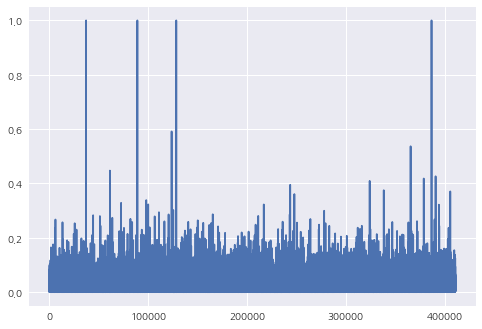

In [22]:
plt.plot(df1.tot_hi_cred_lim)
plt.show()

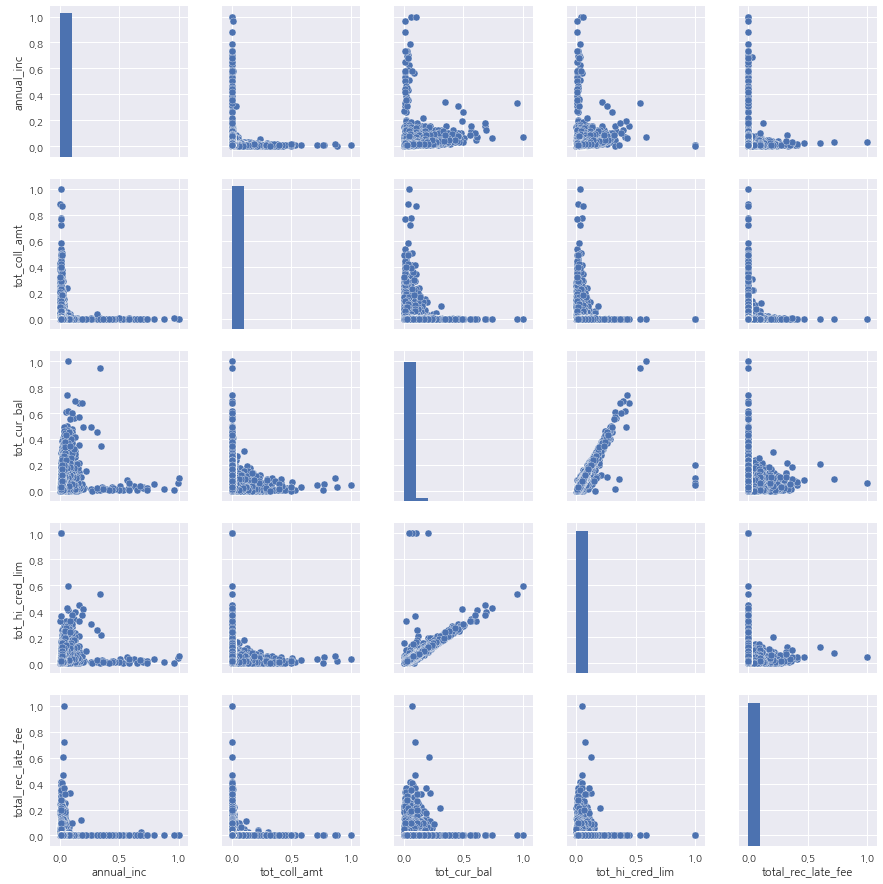

In [23]:
tot2 = ['annual_inc','tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_rec_late_fee']
sns.pairplot(df1[tot2])
plt.show()

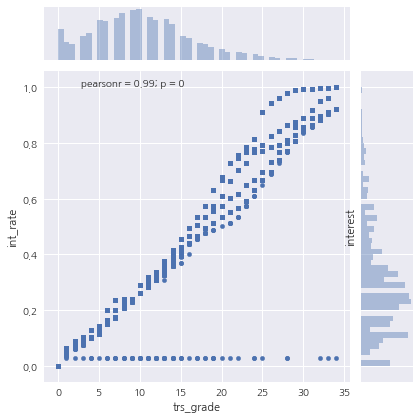

In [26]:
# Grade 를 Integer 형태로 변환하기
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df1["sub_grade"].value_counts().index.sort_values())
le.classes_
df1["trs_grade"]=le.transform(df1["sub_grade"])

sns.jointplot(df1["trs_grade"], df1["int_rate"],s=20)
#plt.xlabel("inverted sub_grade a1 = 0 from g5 = 34")
plt.ylabel("interest")
plt.show()